# **Project Name**    - **Yes Bank Stock Price Prediction** 

##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Agam Singh
##### **Team Member 2 -** Jyoti Patel


# **Project Summary -**

The project aims to analyze and predict the stock price of Yes Bank, a leading private sector bank. The project utilizes various regression techniques, including Linear Regression, Lasso Regression, Ridge Regression, and Elastic Regression, to compare their effectiveness in forecasting the stock price.

The project starts by gathering historical stock price data of Yes Bank, along with relevant financial and market indicators. This dataset is then preprocessed to handle missing values, outliers, and normalize the features for accurate modeling.

Initially, Linear Regression is applied to establish a baseline prediction model. This technique utilizes a linear equation to establish a relationship between the independent variables (features) and the dependent variable (stock price). The model is trained using a portion of the dataset and evaluated on the remaining data to measure its accuracy.

Next, Lasso Regression is employed to identify and select the most relevant features that have a significant impact on the stock price prediction. Lasso Regression applies L1 regularization to the linear regression model, effectively shrinking the coefficients of less important features to zero. The performance of Lasso Regression is then compared to the baseline model.

Following Lasso Regression, Ridge Regression is implemented to address the potential issue of multicollinearity among the independent variables. Ridge Regression applies L2 regularization to the linear regression model, which adds a penalty term to the loss function, reducing the impact of multicollinearity. The accuracy of Ridge Regression is evaluated and compared with the previous models.

Lastly, Elastic Regression is utilized to incorporate both L1 and L2 regularization techniques. It provides a balance between feature selection (Lasso) and addressing multicollinearity (Ridge). By tuning the regularization hyperparameters, Elastic Regression attempts to achieve the optimal model performance.

Throughout the project, the accuracy of each regression technique is assessed using appropriate evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared value. The model with the lowest MSE and RMSE, along with the highest R-squared value, is considered the most accurate in predicting the Yes Bank stock price.

The results and analysis obtained from comparing the various regression techniques will provide valuable insights into the effectiveness of each method for stock price prediction. This project contributes to the field of machine learning by offering a comprehensive comparison of different regression algorithms in the context of financial forecasting, specifically for Yes Bank's stock price.

# **GitHub Link -**

https://github.com/agampawan1/YES_BANK_STOCK_PRICE_PREDICTION

# **Problem Statement**

Yes Bank, a prominent Indian bank, holds a strong position in the financial market, where its stock price is affected by various factors, including the bank's performance, market conditions, and investor sentiment. However, accurately predicting Yes Bank's stock price is challenging due to the inherent volatility of the stock market, influenced by economic indicators, market trends, and investor behavior. Additionally, public opinion and market sentiment significantly contribute to determining stock market prices. Factors such as sentiments, perceptions, and news surrounding Yes Bank can greatly impact investor behavior and, subsequently, the stock price. To improve the accuracy of stock price predictions, incorporating sentiment analysis or news sentiment data becomes crucial.

The analysis of the provided dataset, encompassing historical stock price data, allows for insights into Yes Bank's stock price trends, volatility, and patterns. Considering regulatory compliance, financial disclosures, and market regulations, which influence Yes Bank's stock price as a publicly traded company, is crucial for accurate prediction models. Additionally, analyzing the performance and growth of Yes Bank's diverse banking and financial products for both corporate and retail customers provides further insights into the bank's financial health and impacts stock price predictions.

The closing price of the stock at the end of the month is considered the target variable for prediction. Accurately forecasting this value requires considering various factors, including historical trends, market conditions, and any significant events or news that may impact the stock price.

**Fallowings are some problems which we are dealing  :**

 - The accuracy of predicting Yes Bank's stock price using traditional linear regression models may be limited, considering the complex and dynamic nature of financial markets.

 -Multicollinearity among the independent variables in the dataset might hinder the accuracy of the linear regression models, requiring the implementation of regularization techniques like Lasso, Ridge, and Elastic Regression.

 -The selection of the optimal set of features that have the most significant impact on Yes Bank's stock price prediction is crucial to improve the model's accuracy. This necessitates the use of feature selection methods like Lasso Regression.

 -The fluctuating and volatile nature of stock prices makes it challenging to capture and predict the true underlying trends and patterns. The project needs to address this issue to enhance the accuracy of the stock price predictions.

 - The availability and quality of historical data, financial indicators, and market data might pose a challenge, as it could be incomplete, unreliable, or require significant preprocessing to ensure accurate and meaningful analysis.

 -The project requires efficient hyperparameter tuning for the regularization techniques (Lasso, Ridge, and Elastic Regression) to find the optimal balance between feature selection and addressing multicollinearity, thereby improving the accuracy of the stock price predictions.

 -External factors, such as macroeconomic indicators, regulatory changes, or unforeseen events, may significantly impact the stock prices, making it difficult to capture and incorporate these factors into the prediction models.

 -The evaluation and comparison of the regression techniques need to be carefully conducted using appropriate performance metrics to ensure a fair and comprehensive assessment of their effectiveness in predicting Yes Bank's stock prices.

Overall, the project aims to leverage the available historical stock price data, market dynamics, and external factors to develop prediction models that can provide accurate forecasts of Yes Bank's stock price, considering its performance, market sentiment, and financial indicators.

# ***Let's Begin !***

## ***1. Data***

### Import Libraries

In [2]:
#importing the required libraries
import numpy as np                                     
import pandas as pd 
from numpy import math

from datetime import datetime                         
from statsmodels.tsa.arima_model import ARIMA          


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Importing Lasso model.
from sklearn.linear_model import Lasso
# importing ridge regressor model.
from sklearn.linear_model import Ridge

%matplotlib inline
import matplotlib.pyplot as plt                        
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings                                       
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Mount a drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/ MY Projects/Machine larning/Regression/Yes_Bank_Closing_Price_Prediction/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(185, 5)

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


Data Set has no duplicate values

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Data Set has no null value

In [9]:
# brief summary of the dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [10]:
# getting descriptive statistics of the data.
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Dataset Information

In [11]:
# details of the features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### What we know about our dataset/Dataset Features Explaining

**Explaining the features present :-**

The dataset consists of 185 rows and 5 columns. There are no null values or duplicates present in the dataset. 

**The columns present in the dataset are:**

**Date :** The date (Month and Year provided)

**Open :** The price of the stock at the beginning of a particular time period.

**High :** The Peak(Maximum) price at which a stock traded during the period.

**Low :** The Lowest price at which a stock traded during the period.

**Close :** The trading price at the end (in this case end of the month).




##***Data Wrangling***

**Date column is of 'object' datatype we have to convert it to 'datetime'.**

In [12]:
# convert string object to datetime object
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [13]:
df.set_index('Date', inplace=True)  

In [14]:
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


We can see from the dataframe above, all the columns we have contain numerical data. There is no categorical data present.

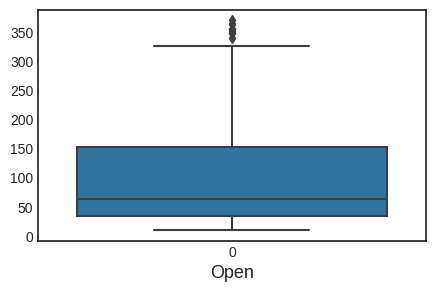

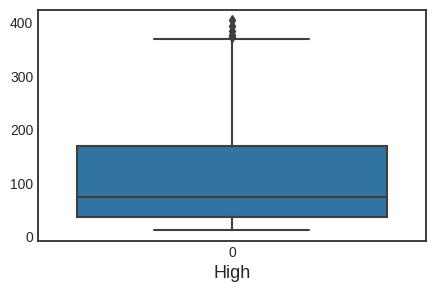

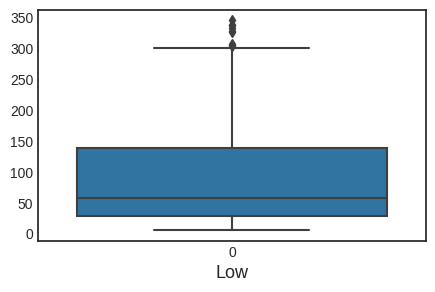

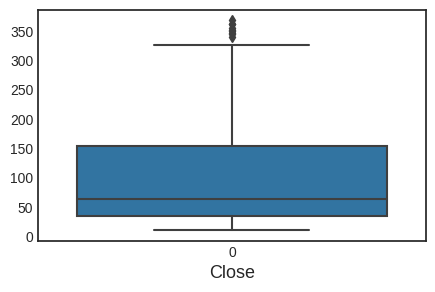

In [15]:
# Checking all features for presence of outliers.
for col in df.columns:
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.xlabel(col, fontsize=13)
  plt.show()

As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling.

#***Exploratory data analysis***

### Separating the dependent and independent variables.

In [16]:
# independent variables.
independent_variables = df.columns.tolist()[:-1]

#dependent variable
dependent_variable = ['Close']


In [17]:
independent_variables

['Open', 'High', 'Low']

In [18]:
dependent_variable

['Close']

##***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

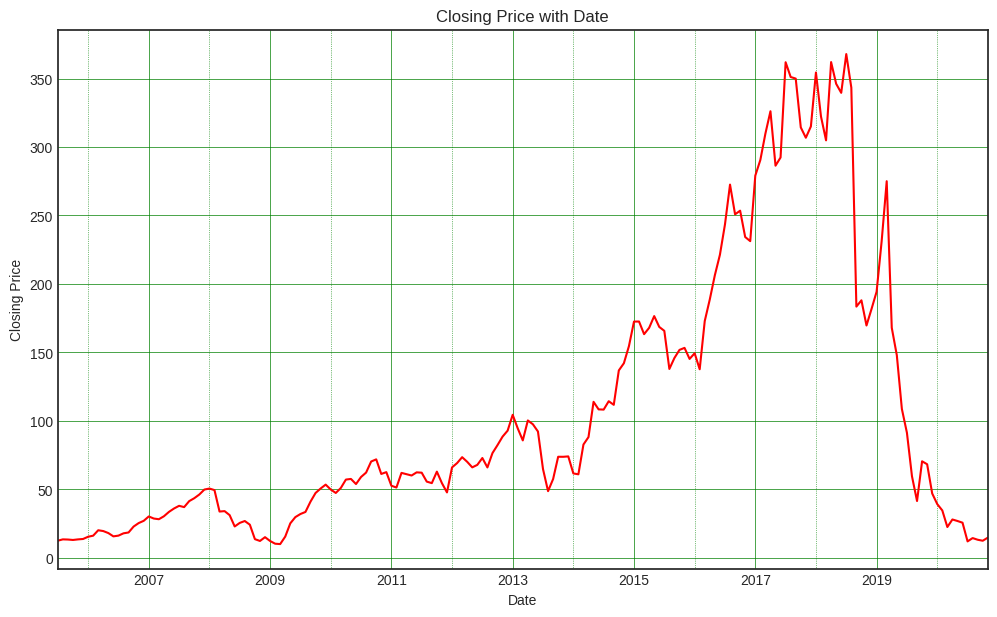

In [19]:
# Plotting the dependent variable .
plt.figure(figsize=(12,7))
df['Close'].plot(color = 'r')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Date')
plt.show()

We can see that the stock price is rising up until 2018 when the fraud case involving Rana Kapoor happened after which the stock price has had a sharp decline.

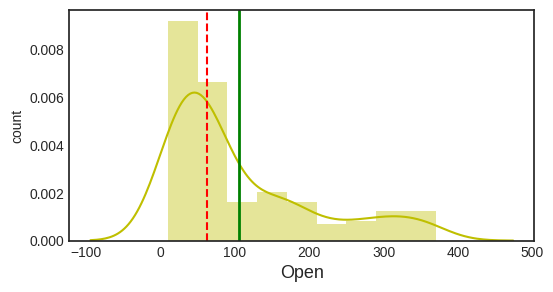

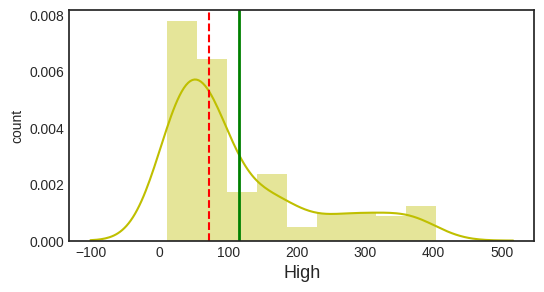

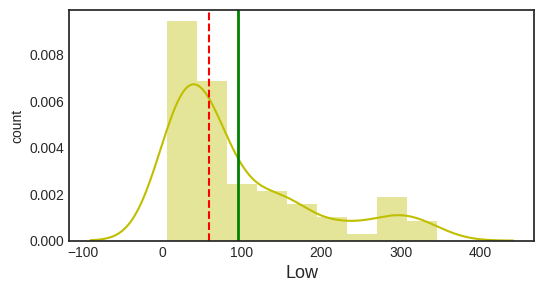

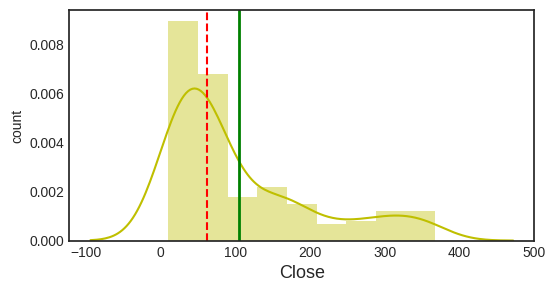

In [20]:
# Plotting the distributions of all features.
for col in df.columns:
  plt.figure(figsize=(6,3))
  sns.distplot(df[col], color='y')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(df[col].mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case). 
  plt.axvline(df[col].median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()

We can clearly see that **these distributions are positively skewed**. The mean and median are at significant distance from each other.

So we need to transform them into something close to a Normal Distribution as our models give optimal results that way.

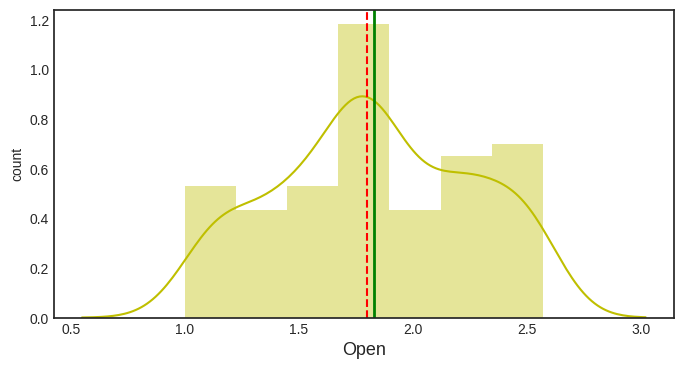

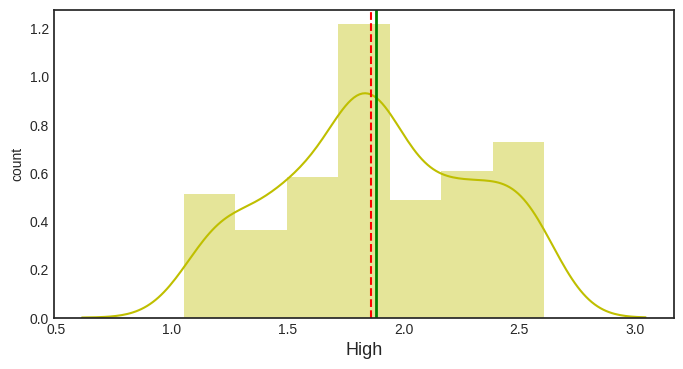

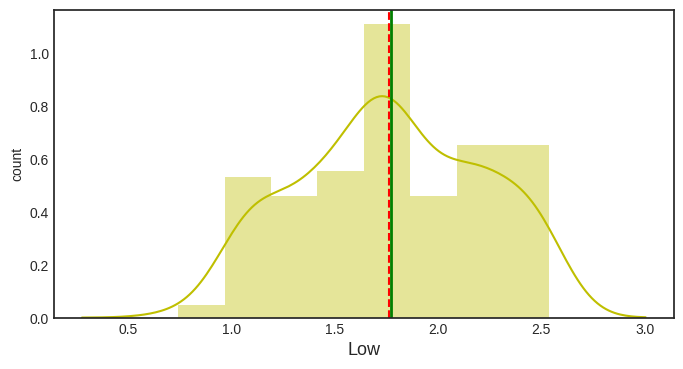

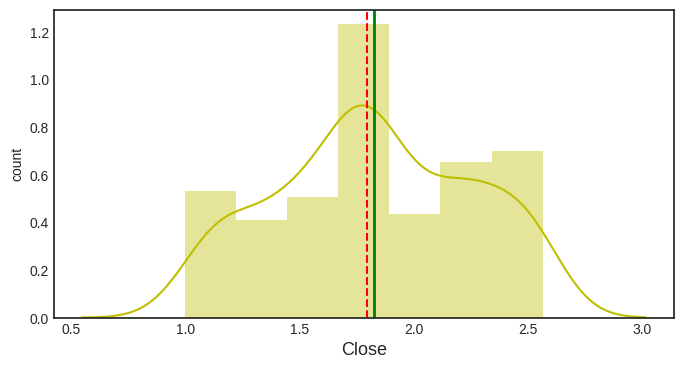

In [21]:
# Lets use log transformation on these features using np.log() and plot them.
for col in df.columns:
  plt.figure(figsize=(8,4))
  sns.distplot(np.log10(df[col]), color='y')
  plt.xlabel(col, fontsize=13)
  plt.ylabel('count')

  # Plotting the mean and the median.
  plt.axvline(np.log10(df[col]).mean(),color='green',linewidth=2) 
  plt.axvline(np.log10(df[col]).median(),color='red',linestyle='dashed',linewidth=1.5)
  plt.show()

**Now, the distributions are very similar to Normal distribution. The mean and median values are nearly same.**

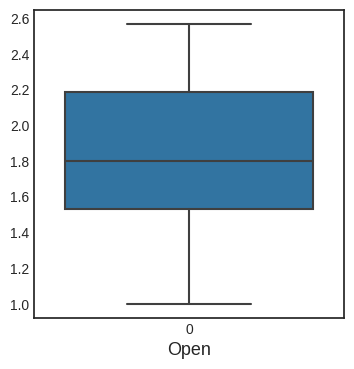

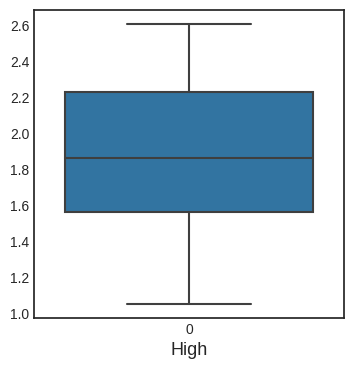

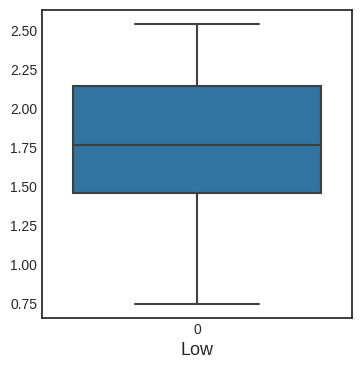

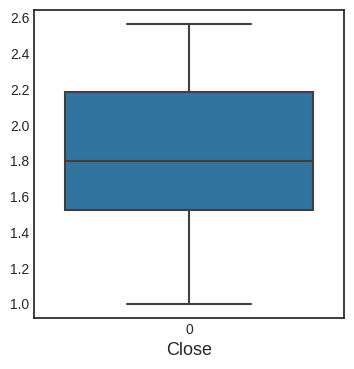

In [22]:
# Let's check for outliers now in the transformed variable data.
for col in df.columns:
  plt.figure(figsize=(4,4))
  sns.boxplot(np.log10(df[col]))
  plt.xlabel(col, fontsize=13)
  plt.show()

**Now, we have no outliers anymore. Log transformation diminishes the outlier's effect.**

*Since we have a very small dataset to work with, dropping the outliers completely is not a good idea.* So  we leave the data as it is.

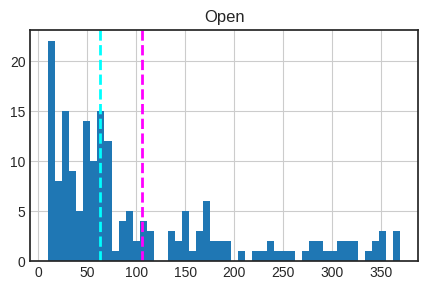

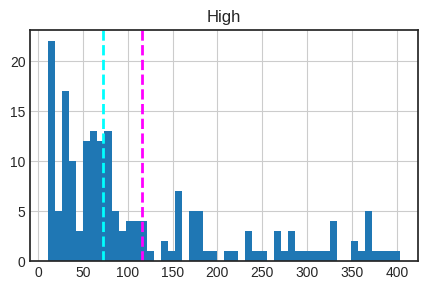

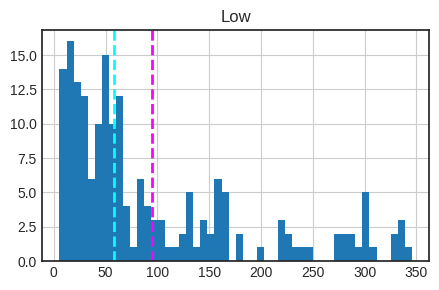

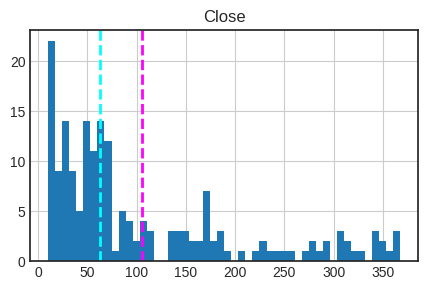

In [23]:
# Check for skewness in the dataset
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
     

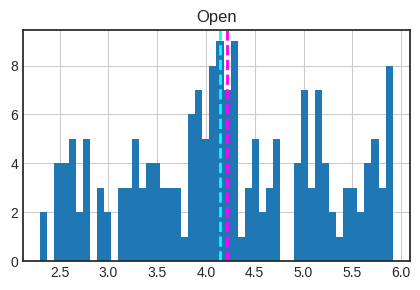

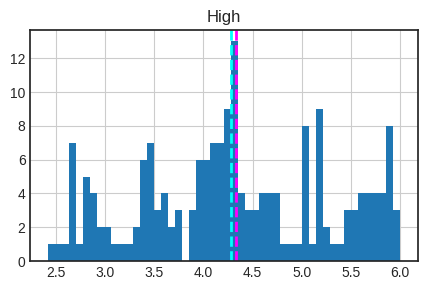

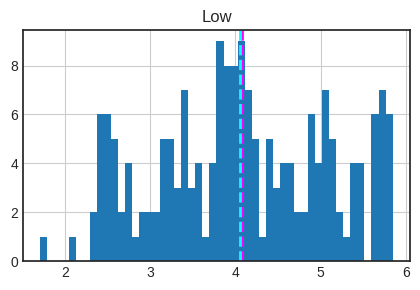

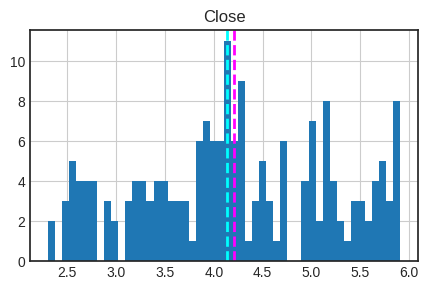

In [24]:
#with log function
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    feature = np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()
     

 ### ***Plotting the independent variables against dependent variable close and also checking the correlation between them.***


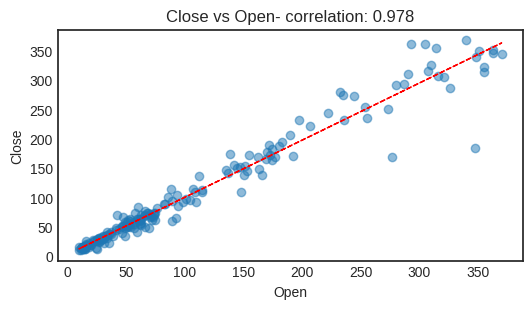

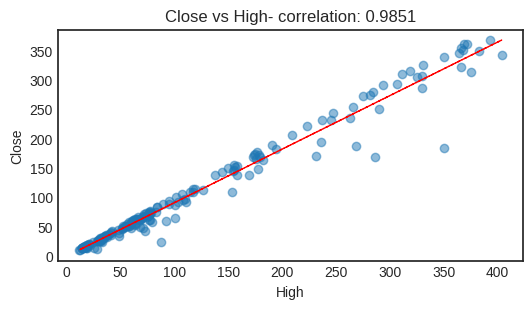

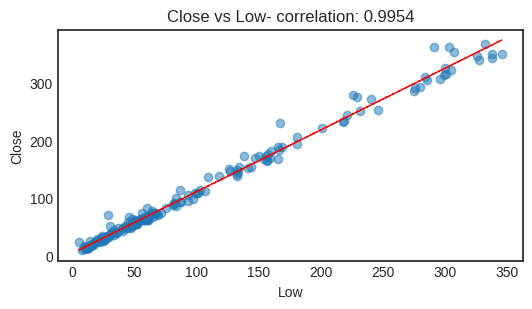

In [25]:
# Plotting the independent variables against dependent variable close and also checking the correlation between them.
for col in independent_variables:

  fig = plt.figure(figsize=(6, 3))
  ax = fig.gca()
  feature = df[col]
  label = df['Close']

  # calculating the correlation between dependent variable and independent features
  correlation = feature.corr(label)  

  # plotting dependent variables against independent features.        
  plt.scatter(x=feature, y=label, alpha=0.5)          

  # Setting the x,y labels and the title.
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),4)))

  z = np.polyfit(df[col], df['Close'], 1)                                
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

***We can see that all of our independent variables are highly correlated to the dependent variable.
And the relationship between dependent and independent variables is linear in nature.***

####  Correlation Heatmap

<Axes: >

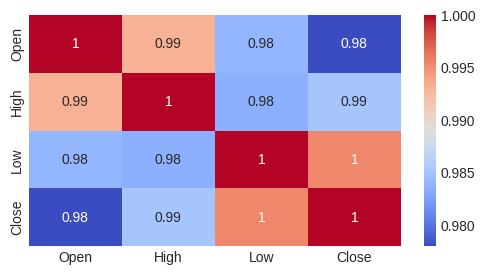

In [26]:
# Now let's visualise for the correlation among all variables.
corr = df.corr()
plt.figure(figsize=(6,3))
sns.heatmap(corr, annot=True, cmap='coolwarm')

**From the heatmap above, we can clearly see that there is a very high correlation between each pair of features in our dataset. While it is desirable for the dependent variable to be highly correlated with independent variables, the independent varibles should ideally not have high correlation with one another.**

***This causes a problem for us as high correlation among independent variables (multicollinearity) is a problem for our models.***

###visualise the relationship between each pair of variables

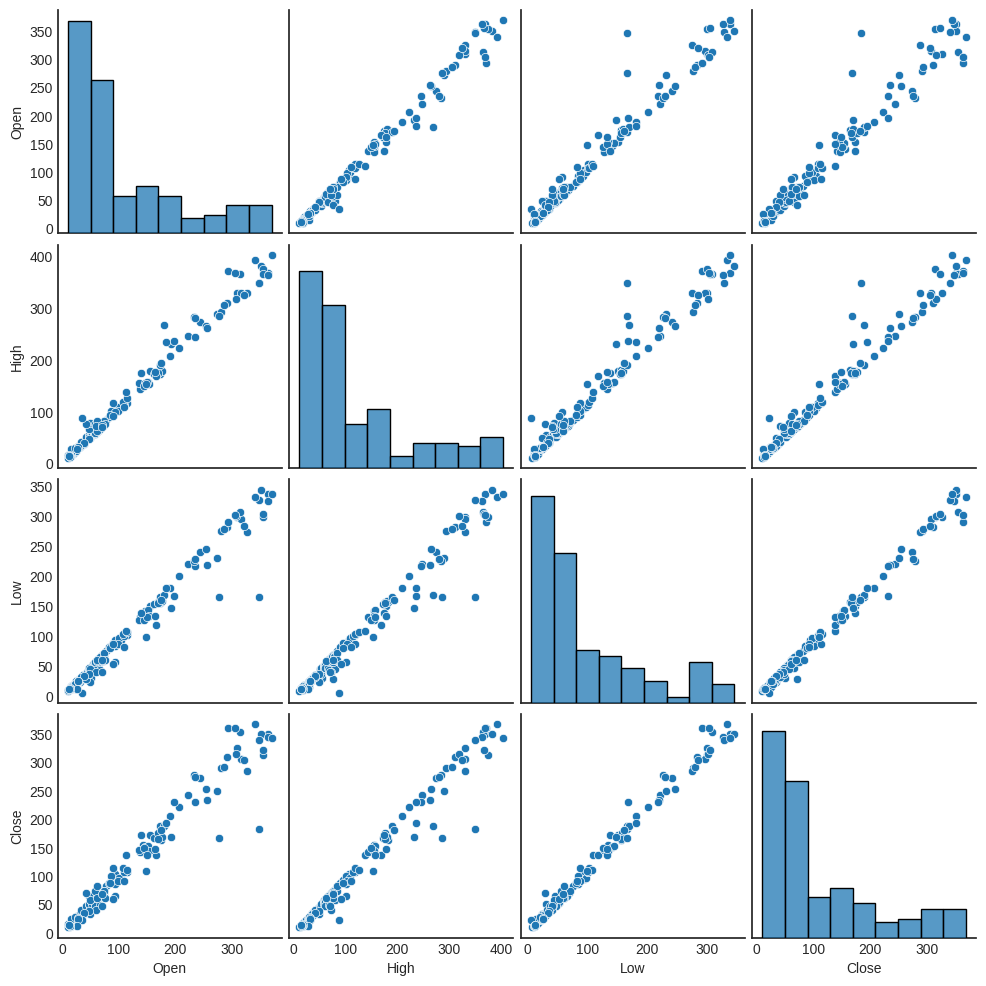

In [27]:
# Let's visualise the relationship between each pair of variables using pair plots.
sns.pairplot(df)

#**Data Preprocessing**

In [28]:
# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [29]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


As we can see the values of VIF factor are very high. However since the dataset is so small and has just 3 independent features, multicollinearity is unavoidable here as any feature engineering will lead to loss of information.

In [30]:
# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables

# applying log transform on our independent variables.
x = np.log10(df[independent_variables]).values            

# Create the dependent variable data
# applying log transform on our dependent variable.
y = np.log10(df[dependent_variable]).values               

#**Train-Test Split**

In [31]:
# splitting the data into a train and a test set. we do this using train test split.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)  

***Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.****

In [32]:
# Scaling the data.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
# checking the values.
x_train[0:5]

array([[ 0.83311596,  0.8243388 ,  0.88445745],
       [-1.41735108, -1.31675483, -1.23862182],
       [ 0.3871812 ,  0.35973888,  0.04241403],
       [-0.06900104,  0.01215654, -0.30051561],
       [-1.91321118, -1.50865163, -1.71568543]])

##***Model Building***

##***1.Implementing linear regression model***

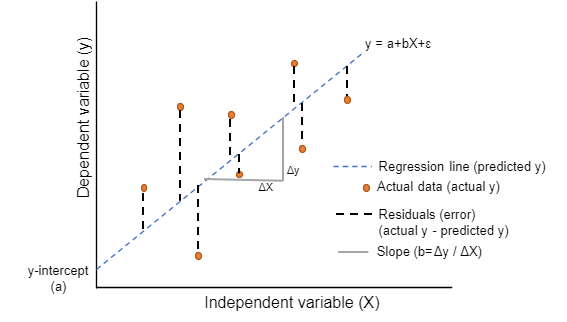

In [34]:
# Initializing the model.
model_lr = LinearRegression()

# Fitting the model on our train data.
model_lr.fit(x_train, y_train)

LinearRegression()

In [35]:
# Predicting on our test data.
y_pred_linear = model_lr.predict(x_test)

In [36]:
# Checking the model parameters. printing the intercept.
model_lr.intercept_

array([1.79986471])

In [37]:
# printing the model coefficients.
model_lr.coef_

array([[-0.22992597,  0.33533242,  0.31585415]])

In [38]:
# Calculating the performance metrics.
MAE_linear = round(mean_absolute_error(10**(y_test),(10**y_pred_linear)),4)
print(f"Mean Absolute Error : {MAE_linear}")

MSE_linear = round(mean_squared_error((10**y_test),10**(y_pred_linear)),4)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = round(r2_score(10**(y_test), 10**(y_pred_linear)),4)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = round(1-(1-r2_score(10**y_test,10**y_pred_linear))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),3)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")

Mean Absolute Error : 4.8168
Mean squared Error : 70.4204
Root Mean squared Error : 8.3917
R2 score : 0.9937
Adjusted R2 score : 0.993


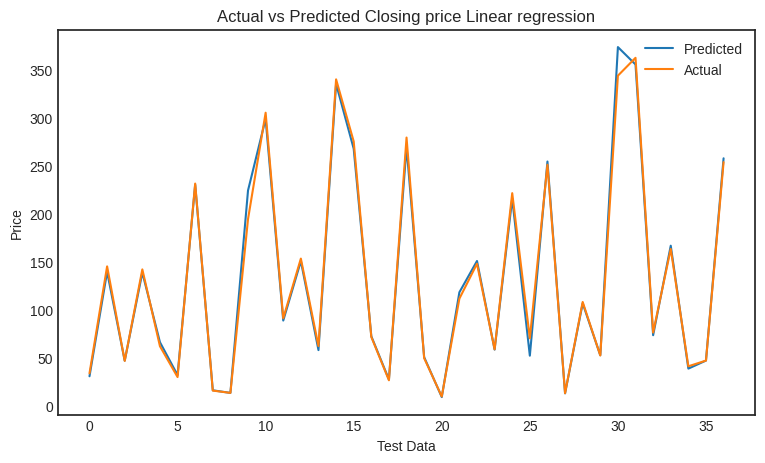

In [39]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_linear)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()
     

From above we can say that our predicted model almost fit to actual.

Now we need to store our performance data for this model so that we can compare them with other models. Let's store them in a dict for now.

In [40]:
linear_regessor_list = {'Mean Absolute Error' : MAE_linear,'Mean squared Error' : MSE_linear,
                   'Root Mean squared Error' : RMSE_linear,'R2 score' : R2_linear,'Adjusted R2 score' : Adjusted_R2_linear }
     

In [41]:
# converting above dict into a dataframe
metric_df = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()

In [42]:
# renaming the columns.
metric_df = metric_df.rename(columns={'index':'Metric',0:'Linear Regression'})
metric_df

,Metric,Linear Regression
0,Mean Absolute Error,4.8168
1,Mean squared Error,70.4204
2,Root Mean squared Error,8.3917
3,R2 score,0.9937
4,Adjusted R2 score,0.9930


We will now use this DataFrame to store all metrics of all other models so we can easily compare them.

##***2.Implementing Lasso Regression with cross validated regularization.***

In [43]:
# Initializing the model with some base values.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

# Fitting the model on our training data.
lasso.fit(x_train, y_train)
     

Lasso(alpha=0.0001, max_iter=3000)

In [44]:
# Printing the intercept and coefficients.
lasso.intercept_

array([1.79986471])

In [45]:
lasso.coef_

array([-0.2079326 ,  0.319775  ,  0.30927158])

In [46]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters. 
                                                                                  
lasso_regressor = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [47]:
# getting the best parameter
# after several iterations and trials, we get this value as best parameter value.
lasso_regressor.best_params_  

{'alpha': 1e-05}

In [48]:
# getting the best score
lasso_regressor.best_score_

-0.0011530156671872803

In [49]:
# Predicting on the test dataset.
y_pred_lasso = lasso_regressor.predict(x_test)
print(y_pred_lasso)

[1.49138725 2.14480164 1.67440535 2.14228699 1.82187891 1.50772917
 2.36207529 1.21547491 1.13723019 2.35007689 2.4750589  1.94911733
 2.17805254 1.76496504 2.52500153 2.427082   1.86088626 1.44157089
 2.43007104 1.70654066 0.97170315 2.07286344 2.17847869 1.76889148
 2.33378329 1.71856753 2.40521703 1.1226477  2.02876294 1.72319367
 2.5717837  2.5499049  1.86710909 2.22199908 1.59040105 1.67512911
 2.41082202]


In [50]:
# checking the performance using evaluation metrics.
MAE_lasso = round(mean_absolute_error(10**(y_test),10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso  = round(mean_squared_error(10**(y_test),10**(y_pred_lasso)),4)
print("Mean squared Error :" , MSE_lasso)

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

R2_lasso = round(r2_score(10**(y_test), 10**(y_pred_lasso)),4)
print("R2 score :" ,R2_lasso)

Adjusted_R2_lasso = round(1-(1-r2_score(10**y_test, 10**y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)

Mean Absolute Error : 4.8262
Mean squared Error : 70.3311
Root Mean squared Error : 8.3864
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [51]:
# Now saving these metrics to our metrics dataframe. First we save them in a list and then we pass them to the df.
metric_df['Lasso'] = [MAE_lasso, MSE_lasso, RMSE_lasso, R2_lasso, Adjusted_R2_lasso]

Text(0.5, 1.0, 'Actual vs Predicted Closing price Lasso regression')

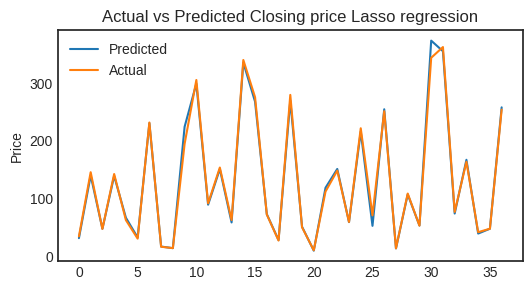

In [52]:
# plotting the predicted values vs actual.
plt.figure(figsize=(6,3))
plt.plot(10**y_pred_lasso)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Lasso regression")

The Graph above represent Lasso Regression prediction of Closing price with respect to Actual 

###***3. Ridge Regression with cross validated regularization.***

In [53]:
# iitializing the model
ridge = Ridge()         

# initiating the parameter grid for alpha (regularization strength).
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# cross validation. 
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [54]:
# finding the best parameter value (for alpha)
ridge_regressor.best_params_

{'alpha': 0.01}

In [55]:
# getting the best score for optimal value of alpha.
ridge_regressor.best_score_
     

-0.001306921437493189

In [56]:
# predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(x_test)
     

In [57]:
# evaluating performance.
MAE_ridge = round(mean_absolute_error(10**(y_test),10**(y_pred_ridge)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = round(mean_squared_error(10**(y_test),10**(y_pred_ridge)),4)
print("Mean squared Error :" , MSE_ridge)

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print("Root Mean squared Error :" ,RMSE_ridge)

R2_ridge = round(r2_score(10**(y_test), 10**(y_pred_ridge)),4)
print("R2 score :" ,R2_ridge)

Adjusted_R2_ridge = round(1-(1-r2_score(10**y_test, 10**y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_ridge)

Mean Absolute Error : 4.8334
Mean squared Error : 70.2641
Root Mean squared Error : 8.3824
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [58]:
# storing these values in a list and appending to our metric df.
ridge_regressor_list = [MAE_ridge,MSE_ridge,RMSE_ridge,R2_ridge,Adjusted_R2_ridge]
metric_df['Ridge'] = ridge_regressor_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Ridge regression')

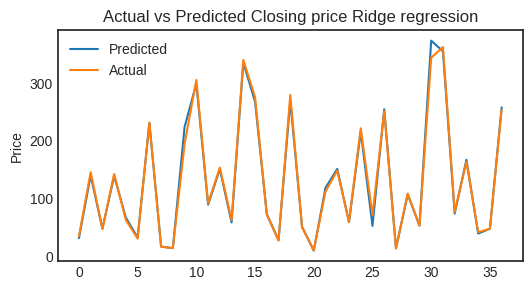

In [60]:
# Plotting predicted and actual target variable values.
plt.figure(figsize=(6,3))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge regression")

##**4. Elastic-Net Regression with cross validation**

In [61]:
# importing and initializing Elastic-Net Regression.
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# initializing parameter grid.
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# cross-validation.
elasticnet_regressor = GridSearchCV(elasticnet_model, elastic_net_param_grid, scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [62]:
# finding the best parameter
elasticnet_regressor.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1}

In [63]:
# finding the best score for the optimal parameter.
elasticnet_regressor.best_score_

-0.0011528695836730079

In [64]:
# making the predictions.
y_pred_elastic_net = elasticnet_regressor.predict(x_test)

In [65]:
MAE_elastic_net = round(mean_absolute_error(10**(y_test),10**(y_pred_elastic_net)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

MSE_elastic_net  = round(mean_squared_error(10**(y_test),10**(y_pred_elastic_net)),4)
print("Mean squared Error :" , MSE_elastic_net)

RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)

R2_elastic_net = round(r2_score(10**(y_test), (10**y_pred_elastic_net)),4)
print("R2 score :" ,R2_elastic_net)

Adjusted_R2_elastic_net = round(1-(1-r2_score(10**y_test, 10**y_pred_elastic_net))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_elastic_net)

Mean Absolute Error : 4.8483
Mean squared Error : 70.1569
Root Mean squared Error : 8.376
R2 score : 0.9938
Adjusted R2 score:  0.9932


In [66]:
# storing these metrics in our dataframe.
elastic_net_metric_list = [MAE_elastic_net,MSE_elastic_net,RMSE_elastic_net,R2_elastic_net,Adjusted_R2_elastic_net]
metric_df['Elastic Net'] = elastic_net_metric_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Elastic Net regression')

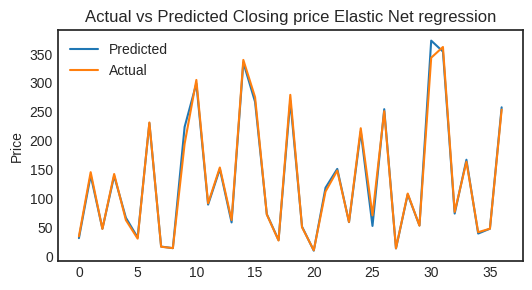

In [68]:
# Now let us plot the actual and predicted target variables values.
plt.figure(figsize=(6,3))
plt.plot(10**y_pred_elastic_net)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Elastic Net regression")

In [69]:
# comparing the performance of all models that we have implemented.
metric_df

,Metric,Linear Regression,Lasso,Ridge,Elastic Net
0,Mean Absolute Error,4.8168,4.8262,4.8334,4.8483
1,Mean squared Error,70.4204,70.3311,70.2641,70.1569
2,Root Mean squared Error,8.3917,8.3864,8.3824,8.3760
3,R2 score,0.9937,0.9938,0.9938,0.9938
4,Adjusted R2 score,0.9930,0.9932,0.9932,0.9932


**From above data, we can clearly see that the best performing model is Elastic Net as it scores the best in every single metric.**

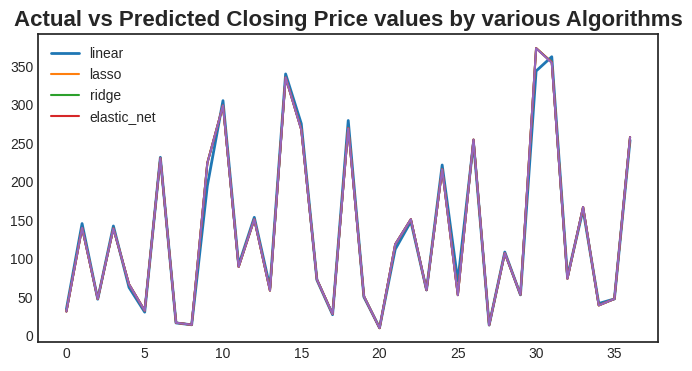

In [71]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(8,4))
plt.plot(10**y_test, linewidth=2)
plt.plot(10**y_pred_linear)
plt.plot(10**y_pred_lasso)
plt.plot(10**y_pred_ridge)
plt.plot(10**y_pred_elastic_net)
plt.legend(['linear','lasso','ridge','elastic_net'])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)
plt.show()

###Lets check for Heterodasticity. Homoscedasticity is an assumption in linear regression algorithm. Homoscedasticity means that the model should perform well on all the datapoints

Text(0.5, 1.0, 'Actual Test data vs Residuals (Elastic Net)')

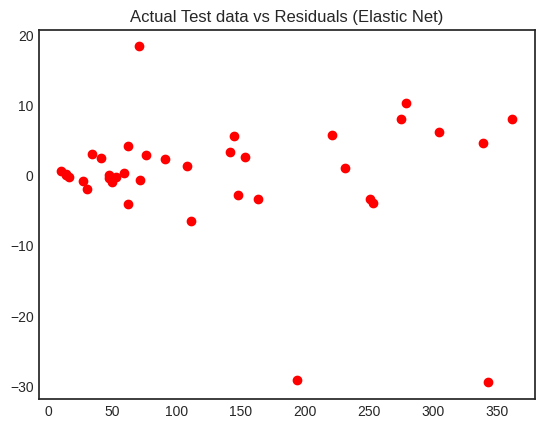

In [73]:
# Plotting the residuals(errors) against actual test data.
residuals = 10**y_test - 10**y_pred_elastic_net.reshape(37,1)
plt.scatter(10**y_test,residuals,c='red')
plt.title('Actual Test data vs Residuals (Elastic Net)')

In the above graph, we have plotted the residuals against test set value for our actual test set values for our best performing model (Elastic Net Regressor).

As we can see, there is no discernable pattern here in the plot. The errors are similar for all datapoints and the model is performing equally well on all datapoints. So we can say that the assumption of Homoscedasticity is valid in this case.

In [74]:
# saving the actual and elastic net predicted target variables values in a dataframe. 
actual_pred_df = pd.DataFrame(10**y_test,10**y_pred_elastic_net).reset_index().rename(columns = {'index':'Actual values',0:'Elastic Net Predicted values'})
actual_pred_df.head()

,Actual values,Elastic Net Predicted values
0,31.028830,34.06
1,139.679454,145.23
2,47.363478,46.95
3,138.780371,142.08
4,66.309870,62.22


# **Conclusion**

Based on the analysis of the Yes Bank stock price prediction using regression analysis, including Linear Regression, Lasso Regression, Ridge Regression, and Elastic Net Regression, we can draw the following conclusions:

**Evaluation Metrics:** Among all the regression models, the Elastic Net Regression consistently outperforms the other models in every metric considered. The evaluation metrics, including Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, R2 score, and Adjusted R2 score, indicate that the Elastic Net Regression provides the best fit to the data.

**Impact of Fraud Case:** By visualizing the target variable, it becomes evident that the 2018 fraud case involving Rana Kapoor had a significant impact on the stock prices. The prices experienced a significant decline during that period.

**Data Quality:** The dataset used for the analysis does not contain any null values or duplicate data, ensuring the reliability of the results.

**Outliers:** Although some outliers were present in the dataset, removing them would result in a loss of valuable information due to the small size of the dataset. Hence, the outliers were retained in the analysis.

**Skewness and Transformation:** The distribution of all variables in the dataset was positively skewed. To address this, a log transformation was performed on the variables to achieve a more symmetric distribution.

**High Correlation:** The analysis revealed a high correlation between the dependent and independent variables, indicating that the target variable can be accurately predicted using the available features.

**Multicollinearity:** Due to the small size of the dataset, a high correlation was observed among the independent variables. Although multicollinearity is unavoidable in such cases, it does not significantly impact the performance of the models.

**Model Performance:** All implemented models performed exceptionally well, yielding an adjusted R2 score of over 99%. The Elastic Net Regression model achieved the highest adjusted R2 score of 0.9932 and consistently scored well in all evaluation metrics.

**Heteroscedasticity:** The presence of heteroscedasticity was assessed by plotting the residuals against the predicted values of the Elastic Net model. No heteroscedasticity was observed, indicating that the model performed well across all data points.

**Deployment:** Given the high accuracy of the model's predictions, it can be confidently deployed for future predictive tasks using new data.

The analysis of the Yes Bank stock price prediction using regression analysis demonstrates the effectiveness of the Elastic Net Regression model in accurately predicting the closing price. The model exhibits strong performance across various evaluation metrics and can be considered reliable for further use in predicting future stock prices.